# Association Rule Mining

### Import required libraries

In [5]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

### Load the dataset

In [7]:
user_details_data = pd.read_csv("/Users/akhilaannireddy/Projects/Machine_learning_project/Dataset/cleaned_user_data.csv")
user_details_data.head()

,user_id,display_name,reputation,profile_image,user_type,link,account_id,is_employee,last_modified_date,last_access_date,...,reputation_change_week,reputation_change_day,creation_date,accept_rate,badge_bronze,badge_silver,badge_gold,account_age_days,account_age_years,age_group
0,109,Kalid,22690,https://www.gravatar.com/avatar/5117b4aacf8b64...,registered,https://stackoverflow.com/users/109/kalid,91,False,2025-01-17 19:05:00,2015-10-10 21:32:52,...,10,0,2008-08-02 00:20:47,88.0,46,45,14,6029,16.5,15-18 Years
1,347807,CristiC,22688,https://www.gravatar.com/avatar/6023ac67694f90...,registered,https://stackoverflow.com/users/347807/cristic,141059,False,2024-04-09 05:40:03,2025-01-23 03:52:19,...,10,0,2010-05-22 13:10:40,96.0,89,61,13,5370,14.7,12-15 Years
2,3427777,fantabolous,22686,https://www.gravatar.com/avatar/34dac9c01fc709...,registered,https://stackoverflow.com/users/3427777/fantab...,4096755,False,2024-10-25 20:10:00,2024-12-09 04:11:00,...,0,0,2014-03-17 06:40:33,80.0,52,57,8,3976,10.9,10-12 Years
3,1858116,Gabriele Santomaggio,22682,https://i.sstatic.net/fQDZf.jpg?s=256,registered,https://stackoverflow.com/users/1858116/gabrie...,2087535,False,2023-12-25 15:00:00,2025-01-27 14:19:21,...,0,0,2012-11-27 23:02:03,78.0,59,58,4,4450,12.2,12-15 Years
4,13767,Rafał Rawicki,22680,https://www.gravatar.com/avatar/b043ead577679f...,registered,https://stackoverflow.com/users/13767/rafa%c5%...,7838,False,2024-05-08 11:00:00,2023-07-05 09:38:01,...,0,0,2008-09-16 20:48:13,88.0,79,63,5,5983,16.4,15-18 Years


### Data Preproccessing

#### step - 1 : Converting numerical attributes into binary categories

Association Rule Mining (ARM) requires data in a transactional format, meaning numerical attributes must be converted into binary categories (1 for presence, 0 for absence). This transformation allows ARM algorithms like Apriori to efficiently identify patterns and generate meaningful rules.

Continuous values cannot be processed directly, as they lead to overly specific and less generalizable rules. Converting attributes like reputation or badge counts into categories such as "high reputation" or "many badges" improves interpretability and pattern detection.

Binary transformation also reduces computational complexity by limiting the number of unique values, making the algorithm more efficient. Additionally, it prevents numerical dominance, ensuring all attributes contribute equally to rule mining.

By converting numerical attributes into binary categories, ARM becomes scalable, interpretable, and capable of extracting valuable insights across different datasets.

In [8]:
user_details_data['high_reputation'] = user_details_data['reputation'].apply(lambda x: 1 if x > 1000 else 0)
user_details_data['many_bronze_badges'] = user_details_data['badge_bronze'].apply(lambda x: 1 if x > 10 else 0)
user_details_data['many_silver_badges'] = user_details_data['badge_silver'].apply(lambda x: 1 if x > 5 else 0)
user_details_data['many_gold_badges'] = user_details_data['badge_gold'].apply(lambda x: 1 if x > 1 else 0)
user_details_data['old_account'] = user_details_data['account_age_days'].apply(lambda x: 1 if x > 1000 else 0)
user_details_data['high_accept_rate'] = user_details_data['accept_rate'].apply(lambda x: 1 if x >= 80 else 0)

#### Step - 2 One-hot encode categorical attributes

In [ ]:
user_details_data = pd.get_dummies(user_details_data, columns=['user_type', 'age_group'], drop_first=True)

#### Step - 3 Selecting only the transformed binary features for ARM

In [11]:
binary_features = ['high_reputation', 'many_bronze_badges', 'many_silver_badges', 
                   'many_gold_badges', 'old_account', 'high_accept_rate']
user_details_data_binary = user_details_data[binary_features]
print("Sample of Transformed Data for ARM:")
user_details_data_binary.head(10)

Sample of Transformed Data for ARM:


,high_reputation,many_bronze_badges,many_silver_badges,many_gold_badges,old_account,high_accept_rate
0,1,1,1,1,1,1
1,1,1,1,1,1,1
2,1,1,1,1,1,1
3,1,1,1,1,1,0
4,1,1,1,1,1,1
5,1,1,1,1,1,1
6,1,1,1,1,1,1
7,1,1,1,1,1,1
8,1,1,1,1,1,0
9,1,1,1,1,1,1


In [12]:
# Saving the cleaned DataFrame as a CSV file
user_details_data_binary.to_csv("user_data_cleaned_for_arm.csv", index=False)

print("CSV file saved successfully!")

CSV file saved successfully!


#### Step -3  Applying Apriori Algorithm

In [13]:
# Find frequent itemsets with a minimum support of 5%
frequent_itemsets = apriori(user_details_data_binary, min_support=0.05, use_colnames=True)

# Generate Association Rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Display the extracted rules
print("\nAssociation Rules:")
rules.head(10)



Association Rules:


/opt/anaconda3/envs/mlpro/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/opt/anaconda3/envs/mlpro/lib/python3.9/site-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(many_bronze_badges),(high_reputation),0.969456,1.000000,0.969456,1.000000,1.0,1.0,0.0,inf,0.0,0.969456,0.0,0.984728
1,(high_reputation),(many_bronze_badges),1.000000,0.969456,0.969456,0.969456,1.0,1.0,0.0,1.0,0.0,0.969456,0.0,0.984728
2,(high_reputation),(many_silver_badges),1.000000,0.999246,0.999246,0.999246,1.0,1.0,0.0,1.0,0.0,0.999246,0.0,0.999623
3,(many_silver_badges),(high_reputation),0.999246,1.000000,0.999246,1.000000,1.0,1.0,0.0,inf,0.0,0.999246,0.0,0.999623
4,(high_reputation),(many_gold_badges),1.000000,0.811164,0.811164,0.811164,1.0,1.0,0.0,1.0,0.0,0.811164,0.0,0.905582
5,(many_gold_badges),(high_reputation),0.811164,1.000000,0.811164,1.000000,1.0,1.0,0.0,inf,0.0,0.811164,0.0,0.905582
6,(high_reputation),(old_account),1.000000,0.999046,0.999046,0.999046,1.0,1.0,0.0,1.0,0.0,0.999046,0.0,0.999523
7,(old_account),(high_reputation),0.999046,1.000000,0.999046,1.000000,1.0,1.0,0.0,inf,0.0,0.999046,0.0,0.999523
8,(high_accept_rate),(high_reputation),0.339628,1.000000,0.339628,1.000000,1.0,1.0,0.0,inf,0.0,0.339628,0.0,0.669814
9,(high_reputation),(high_accept_rate),1.000000,0.339628,0.339628,0.339628,1.0,1.0,0.0,1.0,0.0,0.339628,0.0,0.669814


The Apriori algorithm was applied to identify frequent itemsets with a minimum support of 5%, followed by the generation of association rules using the lift metric with a threshold of 1.0. The extracted rules highlight strong relationships among user attributes, particularly in reputation, badges, and account longevity. Users with many bronze badges almost always have high reputation, while those with high reputation are highly likely to possess silver and gold badges. Additionally, a strong correlation exists between having an old account and a high reputation, suggesting that longevity on the platform contributes to a strong user profile. Another notable finding is that users with a high acceptance rate tend to have high reputation, though this relationship is observed less frequently in the dataset. All rules have a lift value of 1.0, indicating proportional relationships rather than unexpected correlations. These insights provide valuable understanding of user engagement patterns and can be leveraged for predictive modeling and recommendation strategies.

#### Step 4 Extracting Top 15 Rules by Support, Confidence, and Lift

In [17]:
top_support = rules.nlargest(15, 'support')
top_confidence = rules.nlargest(15, 'confidence')
top_lift = rules.nlargest(15, 'lift')

# Display extracted rules for different metrics
from IPython.display import display

print("\n🔹 Top 15 Rules by Support:")
display(top_support)

print("\n🔹 Top 15 Rules by Confidence:")
display(top_confidence)

print("\n🔹 Top 15 Rules by Lift:")
display(top_lift)



🔹 Top 15 Rules by Support:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
2,(high_reputation),(many_silver_badges),1.000000,0.999246,0.999246,0.999246,1.000000,1.0,0.000000,1.000000,0.000000,0.999246,0.000000,0.999623
3,(many_silver_badges),(high_reputation),0.999246,1.000000,0.999246,1.000000,1.000000,1.0,0.000000,inf,0.000000,0.999246,0.000000,0.999623
6,(high_reputation),(old_account),1.000000,0.999046,0.999046,0.999046,1.000000,1.0,0.000000,1.000000,0.000000,0.999046,0.000000,0.999523
7,(old_account),(high_reputation),0.999046,1.000000,0.999046,1.000000,1.000000,1.0,0.000000,inf,0.000000,0.999046,0.000000,0.999523
20,(many_silver_badges),(old_account),0.999246,0.999046,0.998635,0.999389,1.000343,1.0,0.000343,1.561322,0.455363,0.998979,0.359517,0.999489
21,(old_account),(many_silver_badges),0.999046,0.999246,0.998635,0.999589,1.000343,1.0,0.000343,1.835456,0.359737,0.998979,0.455176,0.999489
60,"(high_reputation, many_silver_badges)",(old_account),0.999246,0.999046,0.998635,0.999389,1.000343,1.0,0.000343,1.561322,0.455363,0.998979,0.359517,0.999489
61,"(high_reputation, old_account)",(many_silver_badges),0.999046,0.999246,0.998635,0.999589,1.000343,1.0,0.000343,1.835456,0.359737,0.998979,0.455176,0.999489
62,"(many_silver_badges, old_account)",(high_reputation),0.998635,1.000000,0.998635,1.000000,1.000000,1.0,0.000000,inf,0.000000,0.998635,0.000000,0.999318
63,(high_reputation),"(many_silver_badges, old_account)",1.000000,0.998635,0.998635,0.998635,1.000000,1.0,0.000000,1.000000,0.000000,0.998635,0.000000,0.999318



🔹 Top 15 Rules by Confidence:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(many_bronze_badges),(high_reputation),0.969456,1.000000,0.969456,1.0,1.000000,1.0,0.000000,inf,0.000000,0.969456,0.0,0.984728
3,(many_silver_badges),(high_reputation),0.999246,1.000000,0.999246,1.0,1.000000,1.0,0.000000,inf,0.000000,0.999246,0.0,0.999623
5,(many_gold_badges),(high_reputation),0.811164,1.000000,0.811164,1.0,1.000000,1.0,0.000000,inf,0.000000,0.811164,0.0,0.905582
7,(old_account),(high_reputation),0.999046,1.000000,0.999046,1.0,1.000000,1.0,0.000000,inf,0.000000,0.999046,0.0,0.999523
8,(high_accept_rate),(high_reputation),0.339628,1.000000,0.339628,1.0,1.000000,1.0,0.000000,inf,0.000000,0.339628,0.0,0.669814
22,(high_accept_rate),(many_silver_badges),0.339628,0.999246,0.339628,1.0,1.000754,1.0,0.000256,inf,0.001142,0.339884,1.0,0.669942
28,(high_accept_rate),(old_account),0.339628,0.999046,0.339628,1.0,1.000955,1.0,0.000324,inf,0.001445,0.339952,1.0,0.669976
31,"(many_bronze_badges, many_silver_badges)",(high_reputation),0.968922,1.000000,0.968922,1.0,1.000000,1.0,0.000000,inf,0.000000,0.968922,0.0,0.984461
37,"(many_bronze_badges, many_gold_badges)",(high_reputation),0.795000,1.000000,0.795000,1.0,1.000000,1.0,0.000000,inf,0.000000,0.795000,0.0,0.897500
43,"(many_bronze_badges, old_account)",(high_reputation),0.968569,1.000000,0.968569,1.0,1.000000,1.0,0.000000,inf,0.000000,0.968569,0.0,0.984284



🔹 Top 15 Rules by Lift:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
511,"(many_bronze_badges, many_gold_badges, many_si...",(high_accept_rate),0.794284,0.339628,0.308073,0.387862,1.142020,1.0,0.038311,1.078796,0.604516,0.373042,0.073040,0.647475
538,(high_accept_rate),"(many_bronze_badges, many_gold_badges, many_si...",0.339628,0.794284,0.308073,0.907088,1.142020,1.0,0.038311,2.214103,0.188316,0.373042,0.548350,0.647475
540,"(many_silver_badges, old_account, many_bronze_...",(high_accept_rate),0.794284,0.339628,0.308073,0.387862,1.142020,1.0,0.038311,1.078796,0.604516,0.373042,0.073040,0.647475
547,"(many_bronze_badges, many_gold_badges, many_si...","(high_accept_rate, high_reputation)",0.794284,0.339628,0.308073,0.387862,1.142020,1.0,0.038311,1.078796,0.604516,0.373042,0.073040,0.647475
594,"(high_accept_rate, high_reputation)","(many_bronze_badges, many_gold_badges, many_si...",0.339628,0.794284,0.308073,0.907088,1.142020,1.0,0.038311,2.214103,0.188316,0.373042,0.548350,0.647475
601,(high_accept_rate),"(many_silver_badges, old_account, many_bronze_...",0.339628,0.794284,0.308073,0.907088,1.142020,1.0,0.038311,2.214103,0.188316,0.373042,0.548350,0.647475
334,"(many_bronze_badges, many_gold_badges, old_acc...",(high_accept_rate),0.794370,0.339628,0.308073,0.387820,1.141896,1.0,0.038282,1.078722,0.604308,0.373003,0.072977,0.647454
452,"(many_bronze_badges, high_reputation, many_gol...",(high_accept_rate),0.794370,0.339628,0.308073,0.387820,1.141896,1.0,0.038282,1.078722,0.604308,0.373003,0.072977,0.647454
457,"(many_bronze_badges, many_gold_badges, old_acc...","(high_accept_rate, high_reputation)",0.794370,0.339628,0.308073,0.387820,1.141896,1.0,0.038282,1.078722,0.604308,0.373003,0.072977,0.647454
522,"(many_bronze_badges, many_gold_badges, old_acc...","(high_accept_rate, many_silver_badges)",0.794370,0.339628,0.308073,0.387820,1.141896,1.0,0.038282,1.078722,0.604308,0.373003,0.072977,0.647454


#### Step 5: Visualize the Association Rules as a Network Graph

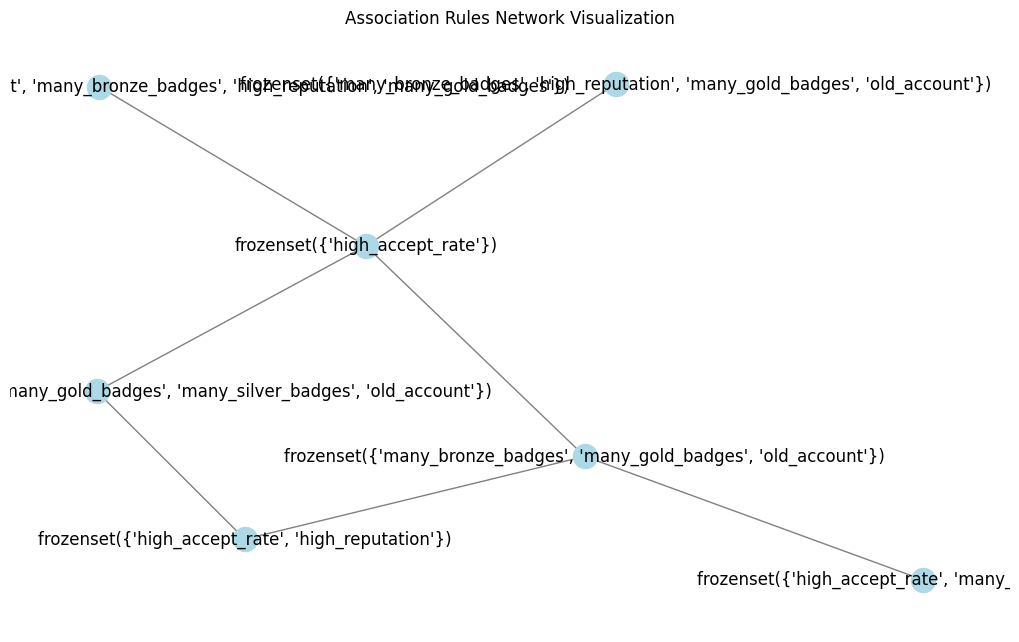

In [18]:
G = nx.Graph()

# Add edges based on top 10 rules by lift
for index, row in top_lift.head(10).iterrows():
    G.add_edge(str(row['antecedents']), str(row['consequents']), weight=row['lift'])

# Draw the network graph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title("Association Rules Network Visualization")
plt.show()

Strong Connections: high_accept_rate and high_reputation are at the center, showing they are highly linked to other attributes.
Experienced Users Stand Out: Users with many_bronze_badges, many_gold_badges, and old_account often appear together, indicating long-term users tend to earn more badges.
Reputation and Badges Go Together: Users with high_reputation are likely to have multiple badges, suggesting reputation grows with engagement.
Cluster Meaning: Larger groups indicate frequent patterns, while smaller nodes show less common but still important associations.
User Engagement Insights: A high acceptance rate is linked to high reputation, meaning active and responsive users gain more credibility.